In [1]:
! pip install diffprivlib



You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!git clone https://github.com/opendp/smartnoise-sdk.git


Cloning into 'smartnoise-sdk'...
remote: Enumerating objects: 6776, done.
remote: Counting objects: 100% (2074/2074), done.
remote: Compressing objects: 100% (1262/1262), done.
remote: Total 6776 (delta 1094), reused 1528 (delta 716), pack-reused 4702
Receiving objects: 100% (6776/6776), 37.35 MiB | 1.47 MiB/s, done.
Resolving deltas: 100% (3902/3902), done.


In [2]:
cd smartnoise-sdk/synth

/Users/xiaolanke/Desktop/2020/harvard/classes/fall2021/capstone AC 297r/Untitled Folder/smartnoise-sdk/synth


In [3]:
!python setup.py build


running build
running build_py


In [4]:
!python setup.py install


running install
/Users/xiaolanke/miniconda3/lib/python3.6/site-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  setuptools.SetuptoolsDeprecationWarning,
/Users/xiaolanke/miniconda3/lib/python3.6/site-packages/setuptools/command/easy_install.py:159: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  EasyInstallDeprecationWarning,
running bdist_egg
running egg_info
writing smartnoise_synth.egg-info/PKG-INFO
writing dependency_links to smartnoise_synth.egg-info/dependency_links.txt
writing requirements to smartnoise_synth.egg-info/requires.txt
writing top-level names to smartnoise_synth.egg-info/top_level.txt
reading manifest file 'smartnoise_synth.egg-info/SOURCES.txt'
writing manifest file 'smartnoise_synth.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.9-x86_64/egg
running install_lib
ru

In [5]:
!pip install opacus


You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
! pip install themis_ml


You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!pip install threadpoolctl


You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
!pip install ctgan==0.4.3


You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [78]:
pwd

'/Users/xiaolanke/Desktop/2020/harvard/classes/fall2021/capstone AC 297r/Untitled Folder'

In [9]:
# jupyter extension that allows reloading functions from imports without clearing kernel :D
%load_ext autoreload
%autoreload 2

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from diffprivlib.models import LogisticRegression as DPLR


from utils import convert_to_cat
from utils import get_synthesizer, get_quail_synthesizer, save_synthetic_data, plot_distributions
from utils import get_classification_summary, get_table_metrics, get_epsilon_plots
from utils import dp_model_classification_helper, get_dp_model_table_metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



In [101]:
import warnings
warnings.filterwarnings('ignore')

# 1. Convert all columns to categorical

In [102]:
from themis_ml.datasets import german_credit
credit = german_credit(raw=True)
credit.shape

(1000, 21)

In [103]:
processed_german = convert_to_cat(credit,"german")
processed_german.shape
processed_german

,duration_in_month,credit_amount,installment_rate_in_percentage_of_disposable_income,age,credit_history,housing,status_of_existing_checking_account,present_employment_since,purpose,credit_risk
0,0,2,4,1,4,1,1,4,0,1
1,4,11,2,0,2,1,2,2,0,0
2,1,4,2,1,4,1,0,3,1,1
3,3,15,2,1,2,2,1,3,2,1
4,2,9,3,1,3,2,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...
995,1,3,3,1,2,1,0,3,2,1
996,2,7,4,1,2,1,1,2,4,1
997,1,1,4,1,2,1,0,4,0,1
998,3,3,4,0,2,2,1,2,0,0


In [104]:
print(processed_german.dtypes)

duration_in_month                                      int64
credit_amount                                          int64
installment_rate_in_percentage_of_disposable_income    int64
age                                                    int64
credit_history                                         int64
housing                                                int64
status_of_existing_checking_account                    int64
present_employment_since                               int64
purpose                                                int64
credit_risk                                            int64
dtype: object


In [105]:
processed_train, processed_test = train_test_split(processed_german, test_size=0.2, random_state=0)

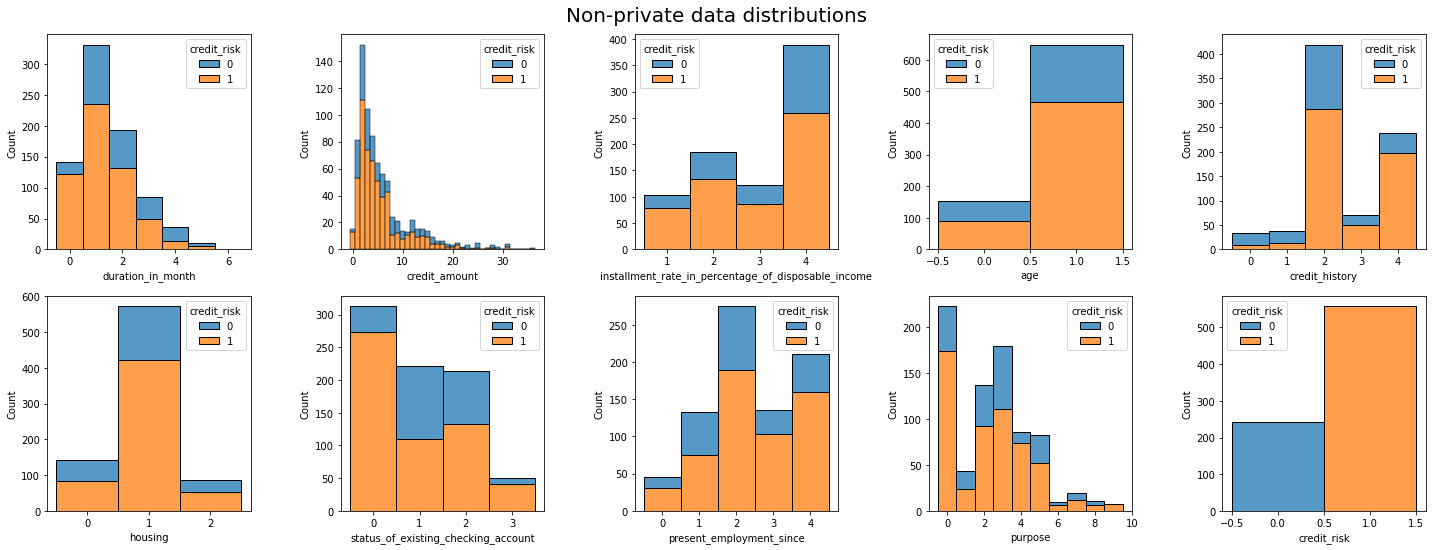

In [106]:
plot_distributions(processed_train, title="Non-private data distributions",dataset = "german")

# 2. Train binary classifier on non-private data


In [107]:
y_train_pred, y_test_pred = get_classification_summary(processed_train, processed_test, classifier="logistic",dataset="german")
print(f"Avg train pred: {np.mean(y_train_pred):.4f}, Avg test pred: {np.mean(y_test_pred):.4f}")


CLASSIFICATION RESULTS (logistic, eval on test data)

True positive rates:
<=25: 0.9500, >25: 0.8525

False positive rates:
<=25: 0.6667, >25: 0.7250

Equalized odds distances:
y=1: -0.0975, y=0: 0.0583

Classification accuracies:
<=25: 0.6579, >25: 0.7099

F1-score: 0.8039

Avg train pred: 0.8363, Avg test pred: 0.8200


# 3. New MWEM synthesis

# 4. New DP-CTGAN synthesis

In [112]:
# Set range of epsilon values
epsilon_vals = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
# epsilon_vals = [3.0]
# Generate 10 repetitions of synthetic data with DP-CTGAN 
save_synthetic_data(epsilon_vals, processed_train, synthesizer="DPCTGAN", n_reps=10)

Epoch 1, Loss G: 0.6892, Loss D: 1.3902
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6881, Loss D: 1.3852
epsilon is 0.6933731047684663, alpha is 19.0
Completed eps=1.0, rep=1.
Epoch 1, Loss G: 0.6877, Loss D: 1.3896
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6881, Loss D: 1.3903
epsilon is 0.6933731047684663, alpha is 19.0
Completed eps=1.0, rep=2.
Epoch 1, Loss G: 0.6867, Loss D: 1.3897
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6881, Loss D: 1.3908
epsilon is 0.6933731047684663, alpha is 19.0
Completed eps=1.0, rep=3.
Epoch 1, Loss G: 0.6878, Loss D: 1.3873
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6886, Loss D: 1.3842
epsilon is 0.6933731047684663, alpha is 19.0
Completed eps=1.0, rep=4.
Epoch 1, Loss G: 0.6893, Loss D: 1.3883
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6888, Loss D: 1.3895
epsilon is 0.6933731047684663, alpha is 19.0
Completed eps=1.0, rep=5.
Epoch 1, Loss G

epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6869, Loss D: 1.3901
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6866, Loss D: 1.3884
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6866, Loss D: 1.3917
epsilon is 1.225147959720004, alpha is 12.0
Epoch 5, Loss G: 0.6863, Loss D: 1.3903
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6845, Loss D: 1.3901
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6866, Loss D: 1.3911
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6848, Loss D: 1.3932
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6828, Loss D: 1.3901
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6839, Loss D: 1.3917
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6840, Loss D: 1.3917
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6822, Loss D: 1.3948
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6831, Loss

Epoch 6, Loss G: 0.6855, Loss D: 1.3904
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6852, Loss D: 1.3879
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6863, Loss D: 1.3883
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6830, Loss D: 1.3872
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6836, Loss D: 1.3937
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6827, Loss D: 1.3917
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6836, Loss D: 1.3926
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6826, Loss D: 1.3909
epsilon is 2.58490588317642, alpha is 7.2
Completed eps=3.0, rep=8.
Epoch 1, Loss G: 0.6891, Loss D: 1.3884
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6878, Loss D: 1.3880
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6878, Loss D: 1.3898
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6886, Loss D: 1.3881
epsilon is

Epoch 19, Loss G: 0.6804, Loss D: 1.3941
epsilon is 3.237753866890725, alpha is 6.1
Epoch 20, Loss G: 0.6797, Loss D: 1.3954
epsilon is 3.337283861871429, alpha is 6.0
Epoch 21, Loss G: 0.6800, Loss D: 1.3947
epsilon is 3.4347873762213474, alpha is 5.9
Epoch 22, Loss G: 0.6798, Loss D: 1.3923
epsilon is 3.5303632332677353, alpha is 5.8
Completed eps=4.0, rep=3.
Epoch 1, Loss G: 0.6898, Loss D: 1.3893
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6890, Loss D: 1.3877
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6899, Loss D: 1.3882
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6871, Loss D: 1.3891
epsilon is 1.225147959720004, alpha is 12.0
Epoch 5, Loss G: 0.6848, Loss D: 1.3887
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6871, Loss D: 1.3912
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6873, Loss D: 1.3902
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6856, Loss D: 1.3870
ep

Epoch 5, Loss G: 0.6856, Loss D: 1.3885
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6871, Loss D: 1.3888
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6872, Loss D: 1.3893
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6846, Loss D: 1.3917
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6861, Loss D: 1.3871
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6857, Loss D: 1.3907
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6848, Loss D: 1.3937
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6834, Loss D: 1.3899
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6826, Loss D: 1.3940
epsilon is 2.58490588317642, alpha is 7.2
Epoch 14, Loss G: 0.6820, Loss D: 1.3919
epsilon is 2.7016802922273264, alpha is 6.9
Epoch 15, Loss G: 0.6818, Loss D: 1.3905
epsilon is 2.814869476874424, alpha is 6.7
Epoch 16, Loss G: 0.6818, Loss D: 1.3922
epsilon is 2.9247705484550575, alpha 

Epoch 2, Loss G: 0.6874, Loss D: 1.3901
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6864, Loss D: 1.3891
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6885, Loss D: 1.3893
epsilon is 1.225147959720004, alpha is 12.0
Epoch 5, Loss G: 0.6858, Loss D: 1.3914
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6848, Loss D: 1.3941
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6846, Loss D: 1.3928
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6842, Loss D: 1.3946
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6843, Loss D: 1.3941
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6837, Loss D: 1.3922
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6859, Loss D: 1.3923
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6848, Loss D: 1.3924
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6831, Loss D: 1.3920
epsilon is 2.58490588317642, alpha 

Epoch 33, Loss G: 0.6778, Loss D: 1.3964
epsilon is 4.484026102640599, alpha is 4.9
Completed eps=5.0, rep=4.
Epoch 1, Loss G: 0.6861, Loss D: 1.3884
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6890, Loss D: 1.3877
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6903, Loss D: 1.3885
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6883, Loss D: 1.3878
epsilon is 1.225147959720004, alpha is 12.0
Epoch 5, Loss G: 0.6893, Loss D: 1.3865
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6873, Loss D: 1.3885
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6869, Loss D: 1.3892
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6863, Loss D: 1.3881
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6848, Loss D: 1.3908
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6843, Loss D: 1.3912
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6834, Loss D: 1.3938
epsil

epsilon is 4.238641774405894, alpha is 5.1
Epoch 31, Loss G: 0.6764, Loss D: 1.3936
epsilon is 4.321699754590711, alpha is 5.1
Epoch 32, Loss G: 0.6767, Loss D: 1.3962
epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6751, Loss D: 1.3977
epsilon is 4.484026102640599, alpha is 4.9
Completed eps=5.0, rep=7.
Epoch 1, Loss G: 0.6887, Loss D: 1.3899
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6898, Loss D: 1.3855
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6864, Loss D: 1.3872
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6852, Loss D: 1.3885
epsilon is 1.225147959720004, alpha is 12.0
Epoch 5, Loss G: 0.6860, Loss D: 1.3913
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6864, Loss D: 1.3895
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6878, Loss D: 1.3913
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6851, Loss D: 1.3919
epsilon is 1.925440408201934, alpha is 8.8
Ep

Epoch 28, Loss G: 0.6772, Loss D: 1.3979
epsilon is 4.06985752586739, alpha is 5.3
Epoch 29, Loss G: 0.6741, Loss D: 1.3968
epsilon is 4.154729409099354, alpha is 5.2
Epoch 30, Loss G: 0.6754, Loss D: 1.3968
epsilon is 4.238641774405894, alpha is 5.1
Epoch 31, Loss G: 0.6770, Loss D: 1.3987
epsilon is 4.321699754590711, alpha is 5.1
Epoch 32, Loss G: 0.6757, Loss D: 1.3953
epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6761, Loss D: 1.3941
epsilon is 4.484026102640599, alpha is 4.9
Completed eps=5.0, rep=10.
Epoch 1, Loss G: 0.6888, Loss D: 1.3868
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6894, Loss D: 1.3877
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6896, Loss D: 1.3883
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6885, Loss D: 1.3903
epsilon is 1.225147959720004, alpha is 12.0
Epoch 5, Loss G: 0.6867, Loss D: 1.3917
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6862, Loss D: 1.3858
epsil

epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6880, Loss D: 1.3904
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6887, Loss D: 1.3894
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6874, Loss D: 1.3885
epsilon is 1.225147959720004, alpha is 12.0
Epoch 5, Loss G: 0.6885, Loss D: 1.3871
epsilon is 1.4260421891378958, alpha is 10.9
Epoch 6, Loss G: 0.6891, Loss D: 1.3893
epsilon is 1.6063184311135381, alpha is 10.1
Epoch 7, Loss G: 0.6878, Loss D: 1.3871
epsilon is 1.7716122461380632, alpha is 9.4
Epoch 8, Loss G: 0.6885, Loss D: 1.3891
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6847, Loss D: 1.3896
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6838, Loss D: 1.3919
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6827, Loss D: 1.3917
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6815, Loss D: 1.3938
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6849, Loss

epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6848, Loss D: 1.3936
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6839, Loss D: 1.3924
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6860, Loss D: 1.3874
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6837, Loss D: 1.3881
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6843, Loss D: 1.3939
epsilon is 2.58490588317642, alpha is 7.2
Epoch 14, Loss G: 0.6808, Loss D: 1.3901
epsilon is 2.7016802922273264, alpha is 6.9
Epoch 15, Loss G: 0.6853, Loss D: 1.3969
epsilon is 2.814869476874424, alpha is 6.7
Epoch 16, Loss G: 0.6823, Loss D: 1.3917
epsilon is 2.9247705484550575, alpha is 6.6
Epoch 17, Loss G: 0.6809, Loss D: 1.3928
epsilon is 3.0316465375456936, alpha is 6.4
Epoch 18, Loss G: 0.6795, Loss D: 1.3941
epsilon is 3.1360344440415897, alpha is 6.3
Epoch 19, Loss G: 0.6796, Loss D: 1.3929
epsilon is 3.237753866890725, alpha is 6.1
Epoch 20, Loss G: 0.6802, Loss D:

epsilon is 2.814869476874424, alpha is 6.7
Epoch 16, Loss G: 0.6808, Loss D: 1.3924
epsilon is 2.9247705484550575, alpha is 6.6
Epoch 17, Loss G: 0.6828, Loss D: 1.3970
epsilon is 3.0316465375456936, alpha is 6.4
Epoch 18, Loss G: 0.6804, Loss D: 1.3951
epsilon is 3.1360344440415897, alpha is 6.3
Epoch 19, Loss G: 0.6792, Loss D: 1.3927
epsilon is 3.237753866890725, alpha is 6.1
Epoch 20, Loss G: 0.6809, Loss D: 1.3935
epsilon is 3.337283861871429, alpha is 6.0
Epoch 21, Loss G: 0.6793, Loss D: 1.3923
epsilon is 3.4347873762213474, alpha is 5.9
Epoch 22, Loss G: 0.6799, Loss D: 1.3933
epsilon is 3.5303632332677353, alpha is 5.8
Epoch 23, Loss G: 0.6760, Loss D: 1.3939
epsilon is 3.6241179753199417, alpha is 5.7
Epoch 24, Loss G: 0.6784, Loss D: 1.3960
epsilon is 3.716166717842085, alpha is 5.6
Epoch 25, Loss G: 0.6788, Loss D: 1.3975
epsilon is 3.8066341187960675, alpha is 5.5
Epoch 26, Loss G: 0.6784, Loss D: 1.3978
epsilon is 3.895655481661863, alpha is 5.4
Epoch 27, Loss G: 0.6776, 

epsilon is 3.5303632332677353, alpha is 5.8
Epoch 23, Loss G: 0.6796, Loss D: 1.3945
epsilon is 3.6241179753199417, alpha is 5.7
Epoch 24, Loss G: 0.6783, Loss D: 1.3913
epsilon is 3.716166717842085, alpha is 5.6
Epoch 25, Loss G: 0.6779, Loss D: 1.3976
epsilon is 3.8066341187960675, alpha is 5.5
Epoch 26, Loss G: 0.6765, Loss D: 1.3953
epsilon is 3.895655481661863, alpha is 5.4
Epoch 27, Loss G: 0.6780, Loss D: 1.3963
epsilon is 3.9833780140579345, alpha is 5.3
Epoch 28, Loss G: 0.6760, Loss D: 1.3978
epsilon is 4.06985752586739, alpha is 5.3
Epoch 29, Loss G: 0.6765, Loss D: 1.3987
epsilon is 4.154729409099354, alpha is 5.2
Epoch 30, Loss G: 0.6762, Loss D: 1.4015
epsilon is 4.238641774405894, alpha is 5.1
Epoch 31, Loss G: 0.6763, Loss D: 1.3958
epsilon is 4.321699754590711, alpha is 5.1
Epoch 32, Loss G: 0.6751, Loss D: 1.3965
epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6747, Loss D: 1.4010
epsilon is 4.484026102640599, alpha is 4.9
Epoch 34, Loss G: 0.6744, Loss

epsilon is 4.154729409099354, alpha is 5.2
Epoch 30, Loss G: 0.6770, Loss D: 1.3957
epsilon is 4.238641774405894, alpha is 5.1
Epoch 31, Loss G: 0.6761, Loss D: 1.3953
epsilon is 4.321699754590711, alpha is 5.1
Epoch 32, Loss G: 0.6759, Loss D: 1.3937
epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6776, Loss D: 1.3948
epsilon is 4.484026102640599, alpha is 4.9
Epoch 34, Loss G: 0.6764, Loss D: 1.3980
epsilon is 4.5636753667162315, alpha is 4.9
Epoch 35, Loss G: 0.6750, Loss D: 1.3976
epsilon is 4.642543680943746, alpha is 4.8
Epoch 36, Loss G: 0.6745, Loss D: 1.3957
epsilon is 4.720493377139473, alpha is 4.8
Epoch 37, Loss G: 0.6738, Loss D: 1.3955
epsilon is 4.797607183712853, alpha is 4.7
Epoch 38, Loss G: 0.6744, Loss D: 1.3957
epsilon is 4.873860497124979, alpha is 4.7
Epoch 39, Loss G: 0.6760, Loss D: 1.3961
epsilon is 4.949512059003829, alpha is 4.6
Epoch 40, Loss G: 0.6732, Loss D: 1.3968
epsilon is 5.024072168457964, alpha is 4.6
Epoch 41, Loss G: 0.6761, Loss D

epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6821, Loss D: 1.3918
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6834, Loss D: 1.3887
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6792, Loss D: 1.3879
epsilon is 2.58490588317642, alpha is 7.2
Epoch 14, Loss G: 0.6832, Loss D: 1.3924
epsilon is 2.7016802922273264, alpha is 6.9
Epoch 15, Loss G: 0.6814, Loss D: 1.3949
epsilon is 2.814869476874424, alpha is 6.7
Epoch 16, Loss G: 0.6813, Loss D: 1.3904
epsilon is 2.9247705484550575, alpha is 6.6
Epoch 17, Loss G: 0.6805, Loss D: 1.3929
epsilon is 3.0316465375456936, alpha is 6.4
Epoch 18, Loss G: 0.6779, Loss D: 1.3933
epsilon is 3.1360344440415897, alpha is 6.3
Epoch 19, Loss G: 0.6787, Loss D: 1.3937
epsilon is 3.237753866890725, alpha is 6.1
Epoch 20, Loss G: 0.6797, Loss D: 1.3962
epsilon is 3.337283861871429, alpha is 6.0
Epoch 21, Loss G: 0.6797, Loss D: 1.3953
epsilon is 3.4347873762213474, alpha is 5.9
Epoch 22, Loss G: 0.6791, Loss

Epoch 50, Loss G: 0.6731, Loss D: 1.4017
epsilon is 5.736142976729775, alpha is 4.2
Epoch 51, Loss G: 0.6754, Loss D: 1.3973
epsilon is 5.803961933036347, alpha is 4.2
Epoch 52, Loss G: 0.6770, Loss D: 1.3994
epsilon is 5.871780889342918, alpha is 4.2
Epoch 53, Loss G: 0.6756, Loss D: 1.3978
epsilon is 5.939108312805484, alpha is 4.1
Epoch 54, Loss G: 0.6751, Loss D: 1.3967
epsilon is 6.005249865068417, alpha is 4.1
Epoch 55, Loss G: 0.6766, Loss D: 1.3984
epsilon is 6.07139141733135, alpha is 4.1
Epoch 56, Loss G: 0.6773, Loss D: 1.3957
epsilon is 6.137532969594282, alpha is 4.1
Epoch 57, Loss G: 0.6780, Loss D: 1.3956
epsilon is 6.202693873637468, alpha is 4.0
Epoch 58, Loss G: 0.6759, Loss D: 1.3961
epsilon is 6.267161162970122, alpha is 4.0
Completed eps=7.0, rep=4.
Epoch 1, Loss G: 0.6896, Loss D: 1.3899
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6871, Loss D: 1.3870
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6853, Loss D: 1.3889
epsilon 

Epoch 31, Loss G: 0.6769, Loss D: 1.3923
epsilon is 4.321699754590711, alpha is 5.1
Epoch 32, Loss G: 0.6757, Loss D: 1.3932
epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6748, Loss D: 1.4000
epsilon is 4.484026102640599, alpha is 4.9
Epoch 34, Loss G: 0.6771, Loss D: 1.3944
epsilon is 4.5636753667162315, alpha is 4.9
Epoch 35, Loss G: 0.6771, Loss D: 1.3963
epsilon is 4.642543680943746, alpha is 4.8
Epoch 36, Loss G: 0.6762, Loss D: 1.3964
epsilon is 4.720493377139473, alpha is 4.8
Epoch 37, Loss G: 0.6779, Loss D: 1.3971
epsilon is 4.797607183712853, alpha is 4.7
Epoch 38, Loss G: 0.6749, Loss D: 1.3974
epsilon is 4.873860497124979, alpha is 4.7
Epoch 39, Loss G: 0.6740, Loss D: 1.3967
epsilon is 4.949512059003829, alpha is 4.6
Epoch 40, Loss G: 0.6749, Loss D: 1.3961
epsilon is 5.024072168457964, alpha is 4.6
Epoch 41, Loss G: 0.6768, Loss D: 1.3934
epsilon is 5.098585892057915, alpha is 4.5
Epoch 42, Loss G: 0.6757, Loss D: 1.3974
epsilon is 5.171455970104059, alph

Epoch 12, Loss G: 0.6858, Loss D: 1.3912
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6846, Loss D: 1.3917
epsilon is 2.58490588317642, alpha is 7.2
Epoch 14, Loss G: 0.6836, Loss D: 1.3907
epsilon is 2.7016802922273264, alpha is 6.9
Epoch 15, Loss G: 0.6832, Loss D: 1.3908
epsilon is 2.814869476874424, alpha is 6.7
Epoch 16, Loss G: 0.6823, Loss D: 1.3946
epsilon is 2.9247705484550575, alpha is 6.6
Epoch 17, Loss G: 0.6826, Loss D: 1.3954
epsilon is 3.0316465375456936, alpha is 6.4
Epoch 18, Loss G: 0.6821, Loss D: 1.3909
epsilon is 3.1360344440415897, alpha is 6.3
Epoch 19, Loss G: 0.6799, Loss D: 1.3950
epsilon is 3.237753866890725, alpha is 6.1
Epoch 20, Loss G: 0.6799, Loss D: 1.3949
epsilon is 3.337283861871429, alpha is 6.0
Epoch 21, Loss G: 0.6816, Loss D: 1.3928
epsilon is 3.4347873762213474, alpha is 5.9
Epoch 22, Loss G: 0.6792, Loss D: 1.3956
epsilon is 3.5303632332677353, alpha is 5.8
Epoch 23, Loss G: 0.6777, Loss D: 1.3965
epsilon is 3.6241179753199417, 

epsilon is 5.803961933036347, alpha is 4.2
Epoch 52, Loss G: 0.6747, Loss D: 1.3972
epsilon is 5.871780889342918, alpha is 4.2
Epoch 53, Loss G: 0.6755, Loss D: 1.3972
epsilon is 5.939108312805484, alpha is 4.1
Epoch 54, Loss G: 0.6756, Loss D: 1.3970
epsilon is 6.005249865068417, alpha is 4.1
Epoch 55, Loss G: 0.6755, Loss D: 1.3964
epsilon is 6.07139141733135, alpha is 4.1
Epoch 56, Loss G: 0.6780, Loss D: 1.3953
epsilon is 6.137532969594282, alpha is 4.1
Epoch 57, Loss G: 0.6772, Loss D: 1.3947
epsilon is 6.202693873637468, alpha is 4.0
Epoch 58, Loss G: 0.6768, Loss D: 1.3943
epsilon is 6.267161162970122, alpha is 4.0
Completed eps=7.0, rep=9.
Epoch 1, Loss G: 0.6868, Loss D: 1.3914
epsilon is 0.07889938228437102, alpha is 63.0
Epoch 2, Loss G: 0.6878, Loss D: 1.3876
epsilon is 0.6933731047684663, alpha is 19.0
Epoch 3, Loss G: 0.6874, Loss D: 1.3887
epsilon is 0.9910479013615223, alpha is 14.0
Epoch 4, Loss G: 0.6872, Loss D: 1.3908
epsilon is 1.225147959720004, alpha is 12.0
Epoc

epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6764, Loss D: 1.3965
epsilon is 4.484026102640599, alpha is 4.9
Epoch 34, Loss G: 0.6755, Loss D: 1.3969
epsilon is 4.5636753667162315, alpha is 4.9
Epoch 35, Loss G: 0.6744, Loss D: 1.3956
epsilon is 4.642543680943746, alpha is 4.8
Epoch 36, Loss G: 0.6760, Loss D: 1.3991
epsilon is 4.720493377139473, alpha is 4.8
Epoch 37, Loss G: 0.6751, Loss D: 1.3972
epsilon is 4.797607183712853, alpha is 4.7
Epoch 38, Loss G: 0.6743, Loss D: 1.3953
epsilon is 4.873860497124979, alpha is 4.7
Epoch 39, Loss G: 0.6740, Loss D: 1.3986
epsilon is 4.949512059003829, alpha is 4.6
Epoch 40, Loss G: 0.6753, Loss D: 1.3952
epsilon is 5.024072168457964, alpha is 4.6
Epoch 41, Loss G: 0.6766, Loss D: 1.3945
epsilon is 5.098585892057915, alpha is 4.5
Epoch 42, Loss G: 0.6750, Loss D: 1.4000
epsilon is 5.171455970104059, alpha is 4.5
Epoch 43, Loss G: 0.6748, Loss D: 1.3973
epsilon is 5.244326048150204, alpha is 4.5
Epoch 44, Loss G: 0.6753, Loss D

Epoch 57, Loss G: 0.6767, Loss D: 1.3943
epsilon is 6.202693873637468, alpha is 4.0
Epoch 58, Loss G: 0.6795, Loss D: 1.3941
epsilon is 6.267161162970122, alpha is 4.0
Epoch 59, Loss G: 0.6797, Loss D: 1.3941
epsilon is 6.331628452302774, alpha is 4.0
Epoch 60, Loss G: 0.6780, Loss D: 1.3954
epsilon is 6.3960957416354285, alpha is 4.0
Epoch 61, Loss G: 0.6789, Loss D: 1.3963
epsilon is 6.459759387383732, alpha is 3.9
Epoch 62, Loss G: 0.6796, Loss D: 1.3914
epsilon is 6.5225555486013285, alpha is 3.9
Epoch 63, Loss G: 0.6791, Loss D: 1.3930
epsilon is 6.585351709818925, alpha is 3.9
Epoch 64, Loss G: 0.6788, Loss D: 1.3925
epsilon is 6.648147871036521, alpha is 3.9
Epoch 65, Loss G: 0.6804, Loss D: 1.3900
epsilon is 6.710944032254117, alpha is 3.9
Epoch 66, Loss G: 0.6771, Loss D: 1.3950
epsilon is 6.772204757248676, alpha is 3.8
Epoch 67, Loss G: 0.6790, Loss D: 1.3903
epsilon is 6.833332918865544, alpha is 3.8
Epoch 68, Loss G: 0.6791, Loss D: 1.3931
epsilon is 6.8944610804824125, al

Epoch 8, Loss G: 0.6840, Loss D: 1.3914
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6850, Loss D: 1.3923
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6827, Loss D: 1.3893
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6852, Loss D: 1.3915
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6837, Loss D: 1.3898
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6848, Loss D: 1.3943
epsilon is 2.58490588317642, alpha is 7.2
Epoch 14, Loss G: 0.6813, Loss D: 1.3916
epsilon is 2.7016802922273264, alpha is 6.9
Epoch 15, Loss G: 0.6827, Loss D: 1.3917
epsilon is 2.814869476874424, alpha is 6.7
Epoch 16, Loss G: 0.6818, Loss D: 1.3930
epsilon is 2.9247705484550575, alpha is 6.6
Epoch 17, Loss G: 0.6803, Loss D: 1.3934
epsilon is 3.0316465375456936, alpha is 6.4
Epoch 18, Loss G: 0.6817, Loss D: 1.3923
epsilon is 3.1360344440415897, alpha is 6.3
Epoch 19, Loss G: 0.6796, Loss D: 1.3940
epsilon is 3.237753866890725, alpha 

epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6759, Loss D: 1.3978
epsilon is 4.484026102640599, alpha is 4.9
Epoch 34, Loss G: 0.6742, Loss D: 1.3981
epsilon is 4.5636753667162315, alpha is 4.9
Epoch 35, Loss G: 0.6764, Loss D: 1.3979
epsilon is 4.642543680943746, alpha is 4.8
Epoch 36, Loss G: 0.6767, Loss D: 1.3968
epsilon is 4.720493377139473, alpha is 4.8
Epoch 37, Loss G: 0.6751, Loss D: 1.3959
epsilon is 4.797607183712853, alpha is 4.7
Epoch 38, Loss G: 0.6750, Loss D: 1.3967
epsilon is 4.873860497124979, alpha is 4.7
Epoch 39, Loss G: 0.6744, Loss D: 1.3991
epsilon is 4.949512059003829, alpha is 4.6
Epoch 40, Loss G: 0.6757, Loss D: 1.4013
epsilon is 5.024072168457964, alpha is 4.6
Epoch 41, Loss G: 0.6738, Loss D: 1.4009
epsilon is 5.098585892057915, alpha is 4.5
Epoch 42, Loss G: 0.6732, Loss D: 1.3982
epsilon is 5.171455970104059, alpha is 4.5
Epoch 43, Loss G: 0.6732, Loss D: 1.3967
epsilon is 5.244326048150204, alpha is 4.5
Epoch 44, Loss G: 0.6739, Loss D

Epoch 57, Loss G: 0.6762, Loss D: 1.3969
epsilon is 6.202693873637468, alpha is 4.0
Epoch 58, Loss G: 0.6763, Loss D: 1.3980
epsilon is 6.267161162970122, alpha is 4.0
Epoch 59, Loss G: 0.6736, Loss D: 1.3965
epsilon is 6.331628452302774, alpha is 4.0
Epoch 60, Loss G: 0.6771, Loss D: 1.3977
epsilon is 6.3960957416354285, alpha is 4.0
Epoch 61, Loss G: 0.6763, Loss D: 1.3966
epsilon is 6.459759387383732, alpha is 3.9
Epoch 62, Loss G: 0.6768, Loss D: 1.3962
epsilon is 6.5225555486013285, alpha is 3.9
Epoch 63, Loss G: 0.6757, Loss D: 1.3951
epsilon is 6.585351709818925, alpha is 3.9
Epoch 64, Loss G: 0.6750, Loss D: 1.3962
epsilon is 6.648147871036521, alpha is 3.9
Epoch 65, Loss G: 0.6770, Loss D: 1.3990
epsilon is 6.710944032254117, alpha is 3.9
Epoch 66, Loss G: 0.6763, Loss D: 1.3936
epsilon is 6.772204757248676, alpha is 3.8
Epoch 67, Loss G: 0.6776, Loss D: 1.3931
epsilon is 6.833332918865544, alpha is 3.8
Epoch 68, Loss G: 0.6785, Loss D: 1.3946
epsilon is 6.8944610804824125, al

Epoch 8, Loss G: 0.6849, Loss D: 1.3938
epsilon is 1.925440408201934, alpha is 8.8
Epoch 9, Loss G: 0.6848, Loss D: 1.3930
epsilon is 2.07015043994031, alpha is 8.4
Epoch 10, Loss G: 0.6849, Loss D: 1.3905
epsilon is 2.2073688413141452, alpha is 8.0
Epoch 11, Loss G: 0.6845, Loss D: 1.3910
epsilon is 2.33833820676296, alpha is 7.7
Epoch 12, Loss G: 0.6840, Loss D: 1.3898
epsilon is 2.46390288336097, alpha is 7.4
Epoch 13, Loss G: 0.6841, Loss D: 1.3898
epsilon is 2.58490588317642, alpha is 7.2
Epoch 14, Loss G: 0.6811, Loss D: 1.3892
epsilon is 2.7016802922273264, alpha is 6.9
Epoch 15, Loss G: 0.6829, Loss D: 1.3917
epsilon is 2.814869476874424, alpha is 6.7
Epoch 16, Loss G: 0.6811, Loss D: 1.3945
epsilon is 2.9247705484550575, alpha is 6.6
Epoch 17, Loss G: 0.6779, Loss D: 1.3930
epsilon is 3.0316465375456936, alpha is 6.4
Epoch 18, Loss G: 0.6810, Loss D: 1.3920
epsilon is 3.1360344440415897, alpha is 6.3
Epoch 19, Loss G: 0.6802, Loss D: 1.3901
epsilon is 3.237753866890725, alpha 

epsilon is 4.403139091318872, alpha is 5.0
Epoch 33, Loss G: 0.6752, Loss D: 1.3953
epsilon is 4.484026102640599, alpha is 4.9
Epoch 34, Loss G: 0.6759, Loss D: 1.3978
epsilon is 4.5636753667162315, alpha is 4.9
Epoch 35, Loss G: 0.6754, Loss D: 1.3992
epsilon is 4.642543680943746, alpha is 4.8
Epoch 36, Loss G: 0.6755, Loss D: 1.3982
epsilon is 4.720493377139473, alpha is 4.8
Epoch 37, Loss G: 0.6760, Loss D: 1.4032
epsilon is 4.797607183712853, alpha is 4.7
Epoch 38, Loss G: 0.6759, Loss D: 1.3994
epsilon is 4.873860497124979, alpha is 4.7
Epoch 39, Loss G: 0.6771, Loss D: 1.3995
epsilon is 4.949512059003829, alpha is 4.6
Epoch 40, Loss G: 0.6745, Loss D: 1.3952
epsilon is 5.024072168457964, alpha is 4.6
Epoch 41, Loss G: 0.6745, Loss D: 1.3992
epsilon is 5.098585892057915, alpha is 4.5
Epoch 42, Loss G: 0.6740, Loss D: 1.3983
epsilon is 5.171455970104059, alpha is 4.5
Epoch 43, Loss G: 0.6725, Loss D: 1.3966
epsilon is 5.244326048150204, alpha is 4.5
Epoch 44, Loss G: 0.6744, Loss D

Epoch 57, Loss G: 0.6782, Loss D: 1.3970
epsilon is 6.202693873637468, alpha is 4.0
Epoch 58, Loss G: 0.6763, Loss D: 1.3945
epsilon is 6.267161162970122, alpha is 4.0
Epoch 59, Loss G: 0.6784, Loss D: 1.3935
epsilon is 6.331628452302774, alpha is 4.0
Epoch 60, Loss G: 0.6771, Loss D: 1.3950
epsilon is 6.3960957416354285, alpha is 4.0
Epoch 61, Loss G: 0.6793, Loss D: 1.3955
epsilon is 6.459759387383732, alpha is 3.9
Epoch 62, Loss G: 0.6772, Loss D: 1.3931
epsilon is 6.5225555486013285, alpha is 3.9
Epoch 63, Loss G: 0.6778, Loss D: 1.3944
epsilon is 6.585351709818925, alpha is 3.9
Epoch 64, Loss G: 0.6780, Loss D: 1.3945
epsilon is 6.648147871036521, alpha is 3.9
Epoch 65, Loss G: 0.6786, Loss D: 1.3941
epsilon is 6.710944032254117, alpha is 3.9
Epoch 66, Loss G: 0.6779, Loss D: 1.3906
epsilon is 6.772204757248676, alpha is 3.8
Epoch 67, Loss G: 0.6766, Loss D: 1.3910
epsilon is 6.833332918865544, alpha is 3.8
Epoch 68, Loss G: 0.6803, Loss D: 1.3919
epsilon is 6.8944610804824125, al

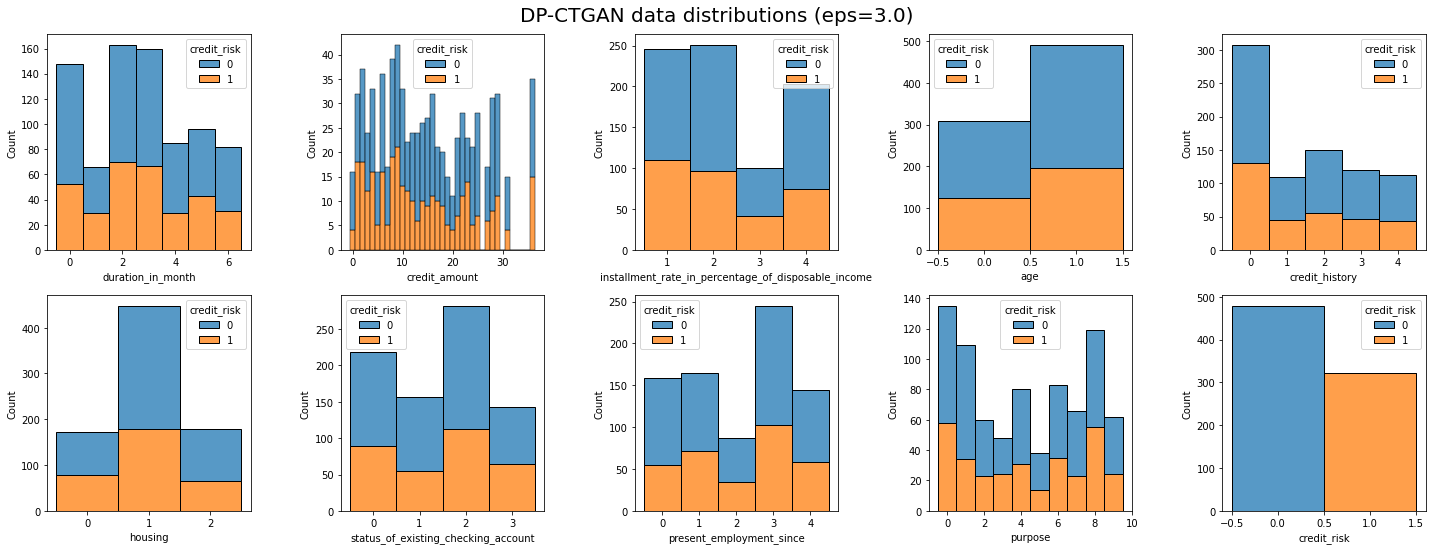

In [109]:
DPCTGAN_eps3_rep0 = pd.read_csv("DPCTGAN_eps=3.0_rep=0.csv", index_col=0)
plot_distributions(DPCTGAN_eps3_rep0, title="DP-CTGAN data distributions (eps=3.0)",dataset = "german")

In [110]:
# Plot the table metrics for DPCTGAN with logistic regression
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("DPCTGAN", epsilon_list=[3.0], nreps=10, classifier="logistic", test_df=processed_test,dataset = "german")
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.000
FPR difference median: 0.000
F1-score median: 0.000


In [96]:
def plot_all_zero_one_cases(synthesizer, epsilons, rep, classifier, test_df):
    ratios = []
    ratios2 = []
    f1_scores = [] 
    for eps in epsilons:
        fname = f"{synthesizer}_eps={eps}_rep={rep}.csv" 
        train_df = pd.read_csv(fname, index_col=0)

        # Train the classification model
        X_train, y_train = train_df.drop(["credit_risk","age"], axis=1), train_df["credit_risk"]
        X_test, y_test = test_df.drop(["credit_risk","age"], axis=1), test_df["credit_risk"]
        ratios2.append(len(train_df[train_df["credit_risk"]==1])/len(train_df))
        if len(np.unique(y_train)) != 2:
            return None
        if classifier == "logistic":
            m = LogisticRegression(max_iter=1000, C=1., penalty="l2")
            m.fit(X_train, y_train)
        elif classifier == "forest":
            m = RandomForestClassifier(random_state=0)
            m.fit(X_train, y_train)
        else:
            raise Exception(f"Classifier {classifier} not recognized.")

        # Predict on the test set
        y_test_pred = m.predict(X_test)
        
        # Get the all classification metrics on the test set
        df = processed_test.copy() # test_df
        df["y"] = y_test
        df["y_pred"] = y_test_pred
        ratio = len(df[df["y_pred"]==1])/len(df)
    
        TP_f = len(df[(df["age"]==0) & (df["y"]==1) & (df["y_pred"]==1)])
        TP_m = len(df[(df["age"]==1) & (df["y"]==1) & (df["y_pred"]==1)])
        FP_f = len(df[(df["age"]==0) & (df["y"]==0) & (df["y_pred"]==1)])
        FP_m = len(df[(df["age"]==1) & (df["y"]==0) & (df["y_pred"]==1)])
        TN_f = len(df[(df["age"]==0) & (df["y"]==0) & (df["y_pred"]==0)])
        TN_m = len(df[(df["age"]==1) & (df["y"]==0) & (df["y_pred"]==0)])
        FN_f = len(df[(df["age"]==0) & (df["y"]==1) & (df["y_pred"]==0)])
        FN_m = len(df[(df["age"]==1) & (df["y"]==1) & (df["y_pred"]==0)])
        f1_score = (TP_f+TP_m) / (TP_f+TP_m + 0.5*(FP_f+FP_m + FN_f+FN_m))
        
        ratios.append(ratio)
        print(ratio)
        f1_scores.append(f1_score)
    
    plt.plot(epsilons, ratios, label="ratio of 1 in y_predict")
    plt.plot(epsilons, ratios2, label="ratio of 1 in synthetic training")
    plt.plot(epsilons, f1_scores, label="f1 scores")
    plt.xlabel("epsilon")
    plt.ylabel("ratio")
    plt.title(synthesizer+" at iteration = "+str(rep))
    plt.legend()

    return

0.06


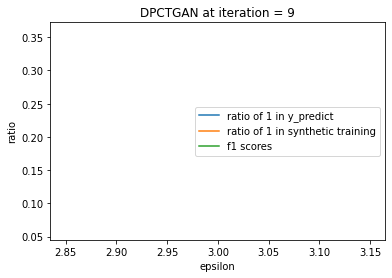

In [97]:
plot_all_zero_one_cases("DPCTGAN", epsilon_vals, 9, "forest", processed_test)

In [111]:
# Plot the table metrics for DPCTGAN with random forest
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("DPCTGAN", epsilon_list=[3.0], nreps=10, classifier="forest", test_df=processed_test,dataset = "german")
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.048
FPR difference median: 0.038
F1-score median: 0.239


In [ ]:
# Plot new DP-CTGAN results at range of epsilon values
get_epsilon_plots(["DPCTGAN"], epsilon_vals, 1, "logistic", processed_test, "median", processed_train, dataset="german")

# 5. New PATE-CTGAN synthesis

In [ ]:
# Set range of epsilon values
epsilon_vals = [3.0]

# Generate 10 repetitions of synthetic data with DP-CTGAN 
save_synthetic_data(epsilon_vals, processed_train, synthesizer="PATECTGAN", n_reps=10)

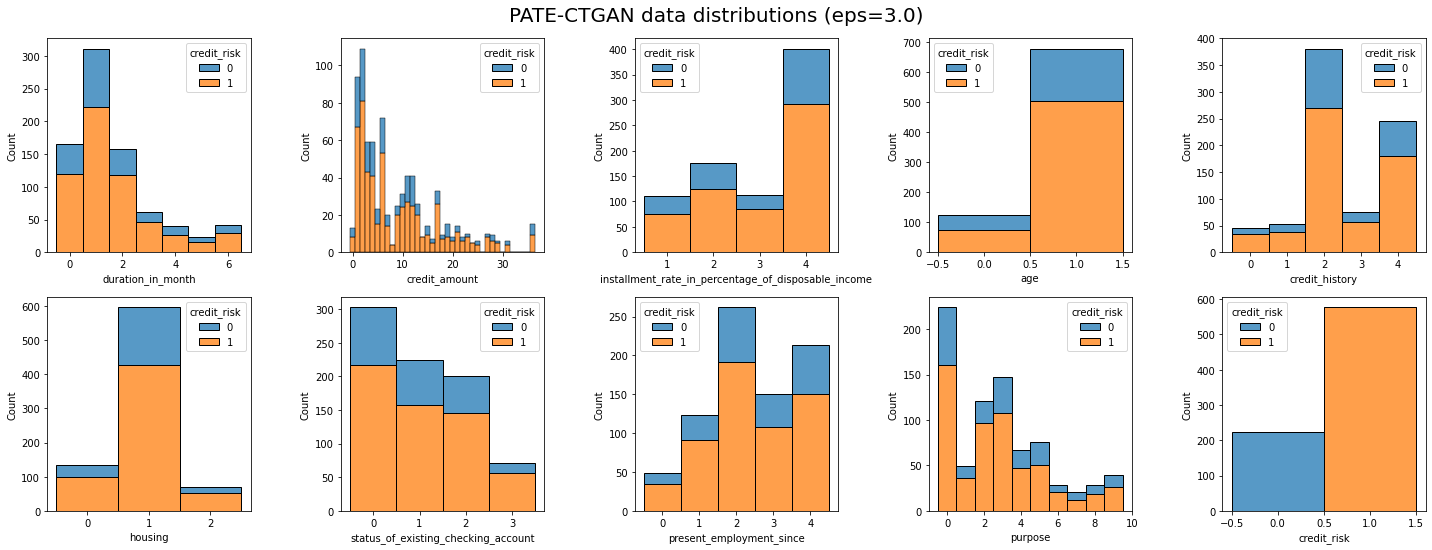

In [39]:
PATECTGAN_eps3_rep0 = pd.read_csv("PATECTGAN_eps=3.0_rep=0.csv", index_col=0)
plot_distributions(PATECTGAN_eps3_rep0, title="PATE-CTGAN data distributions (eps=3.0)",dataset = "german")

In [40]:
# Plot the table metrics for PATECTGAN with logistic regression
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("PATECTGAN", epsilon_list=[3.0], nreps=10, classifier="logistic", test_df=processed_test,dataset = "german")
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: 0.000
FPR difference median: 0.000
F1-score median: 0.830


In [41]:
# Plot the table metrics for PATECTGAN with random forest
tpr_diff_median, fpr_diff_median, f1_score_median = get_table_metrics("PATECTGAN", epsilon_list=[3.0], nreps=10, classifier="forest", test_df=processed_test,dataset = "german")
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

TPR difference median: -0.036
FPR difference median: 0.064
F1-score median: 0.778


# 6. Comparison to DPLR

In [50]:
# Set range of epsilon values
epsilon_vals = [3.0]

# Calculate the median results
tpr_diff_median, fpr_diff_median, f1_score_median = get_dp_model_table_metrics(epsilon_vals, 10, "logistic", processed_train, processed_test, dataset="german")
print(f"TPR difference median: {tpr_diff_median:.3f}")
print(f"FPR difference median: {fpr_diff_median:.3f}")
print(f"F1-score median: {f1_score_median:.3f}")

1 0.675
0 0.325
1 0.705
0 0.295
1 0.635
0 0.365
1 0.675
0 0.325
1 0.71
0 0.29
1 0.725
0 0.275
1 0.62
0 0.38
1 0.655
0 0.345
1 0.735
0 0.265
1 0.765
0 0.235
TPR difference median: -0.045
FPR difference median: 0.040
F1-score median: 0.739


# 7. Comparison to k-anonymity